In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CSV files
df_actual = pd.read_csv('csv_files/Jurua_20170710.csv')  # [file:1]
df_predicted = pd.read_csv('River-Unity/Results/RiverMeshOutput.csv')  # [file:1]
df_initial = pd.read_csv('csv_files/Jurua_19871012.csv')  # [file:1]

cols = ['centerline_x','centerline_y','right_bank_x','right_bank_y','left_bank_x','left_bank_y']

# Undo scaling on df_predicted (was scaled by 0.0005)
scale_factor = 0.0005
df_predicted[cols] = df_predicted[cols] / scale_factor  # [file:1]

# Get offset from first point in initial centerline
x0 = df_initial.loc[0, 'centerline_x']  # [file:1]
y0 = df_initial.loc[0, 'centerline_y']  # [file:1]

# Apply offset to all predicted coordinates
for col in cols:
    if col.endswith('_x'):
        df_predicted[col] = df_predicted[col] + x0  # [file:1]
    elif col.endswith('_y'):
        df_predicted[col] = df_predicted[col] + y0  # [file:1]

# Now extract arrays if needed
actual_data = df_actual[cols].to_numpy()  # [file:1]
predicted_data = df_predicted[cols].to_numpy()  # [file:1]
initial_data = df_initial[['centerline_x','centerline_y']].to_numpy()  # [file:1]

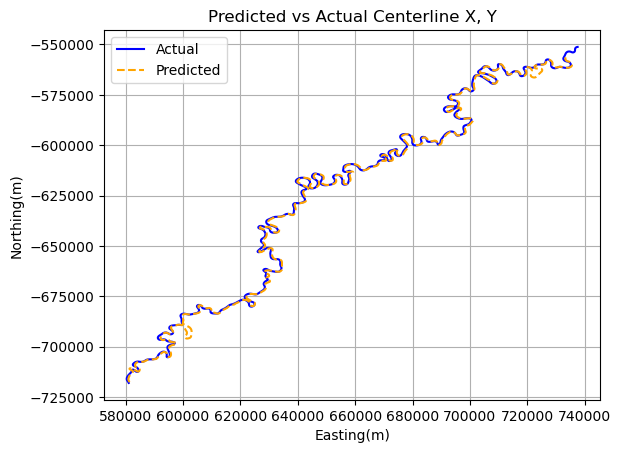

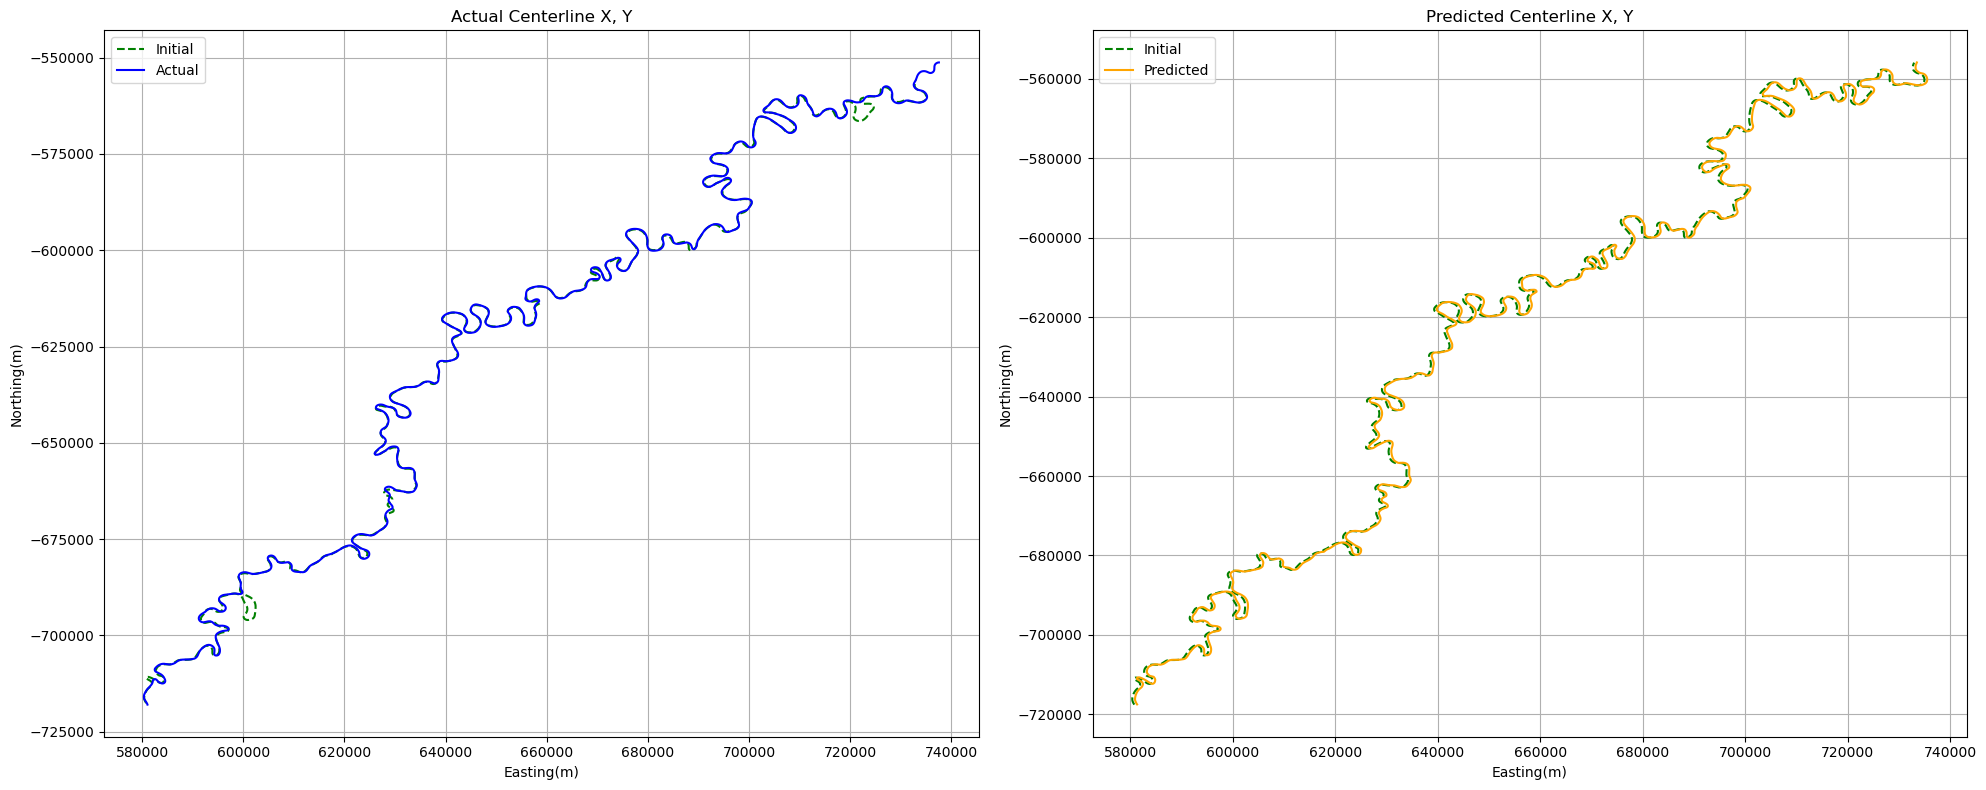

In [3]:
# Plot predicted vs actual
plt.figure()
# plt.plot(initial_data[:, 0], initial_data[:, 1], label='Initial', color='green', linestyle=':')
plt.plot(actual_data[:, 0], actual_data[:, 1], label='Actual', color='blue')
plt.plot(predicted_data[:, 0], predicted_data[:, 1], label='Predicted', color='orange', linestyle='--')
plt.xlabel('Easting(m)')
plt.ylabel('Northing(m)')
plt.title('Predicted vs Actual Centerline X, Y')
plt.legend()
plt.grid()
plt.show()

# Plotting each separately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(initial_data[:, 0], initial_data[:, 1], label='Initial', color='green', linestyle='--')
ax1.plot(actual_data[:, 0], actual_data[:, 1], label='Actual', color='blue')
ax1.set_xlabel('Easting(m)')
ax1.set_ylabel('Northing(m)')
ax1.set_title('Actual Centerline X, Y')
ax1.legend()
ax1.grid()  

ax2.plot(initial_data[:, 0], initial_data[:, 1], label='Initial', color='green', linestyle='--')
ax2.plot(predicted_data[:, 0], predicted_data[:, 1], label='Predicted', color='orange')
ax2.set_xlabel('Easting(m)')
ax2.set_ylabel('Northing(m)')
ax2.set_title('Predicted Centerline X, Y')
ax2.legend()
ax2.grid()  

plt.tight_layout()
plt.show()

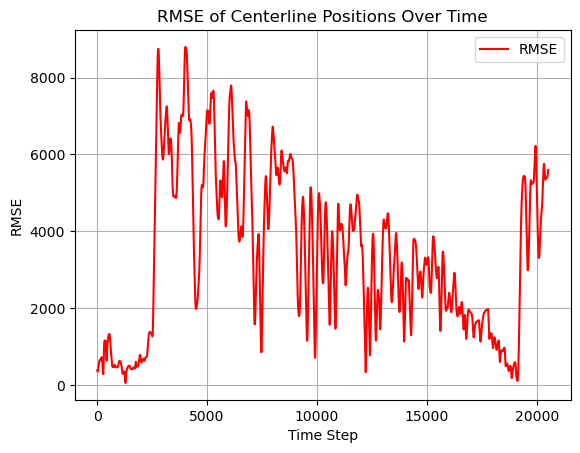

In [ ]:
# Calculate RMSE for centerline positions (X and Y) over time
# Trim both to the common minimum length along time axis
n = min(actual_data.shape[0], predicted_data.shape[0])  # [file:1]
actual_cl = actual_data[:n, 0:2]                        # [file:1]
pred_cl = predicted_data[:n, 0:2]                       # [file:1]
rmse = np.sqrt(np.mean((pred_cl - actual_cl) ** 2, axis=1))  # [file:1]

plt.figure()
plt.plot(rmse, label='RMSE', color='red')  # [file:1]
plt.xlabel('Time Step (days)')  # [file:1]
plt.ylabel('RMSE (m)')  # [file:1]
plt.title('RMSE of Centerline Positions Over Time')  # [file:1]
plt.legend()  # [file:1]
plt.grid()  # [file:1]
plt.show()  # [file:1]

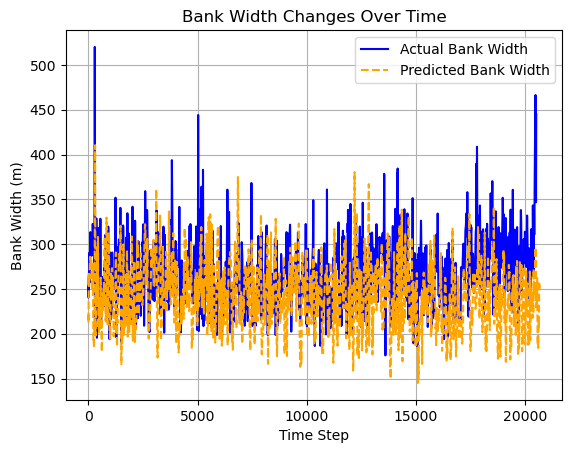

In [ ]:
# Calculate and plot bank width changes over time
actual_bank_width = np.sqrt((actual_data[:, 2] - actual_data[:, 4])**2 + (actual_data[:, 3] - actual_data[:, 5])**2)
predicted_bank_width = np.sqrt((predicted_data[:, 2] - predicted_data[:, 4])**2 + (predicted_data[:, 3] - predicted_data[:, 5])**2)
plt.figure()
plt.plot(actual_bank_width, label='Actual Bank Width', color='blue')
plt.plot(predicted_bank_width, label='Predicted Bank Width', color='orange', linestyle='--')
plt.xlabel('Time Step (days)')
plt.ylabel('Bank Width (m)')
plt.title('Bank Width Changes Over Time')
plt.legend()
plt.grid()
plt.show()

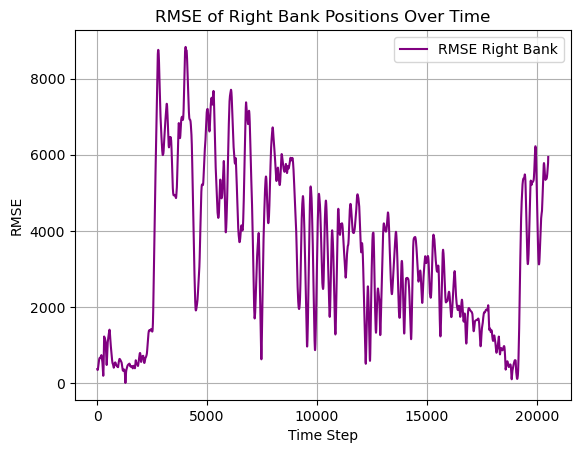

In [ ]:
# Calculate and plot rmse for right bank
# Use both X and Y for right bank (columns 2 and 3)
actual_c2 = actual_data[:n, 2:4]                        # [file:1]
pred_c2 = predicted_data[:n, 2:4]                       # [file:1]
rmse_right_bank = np.sqrt(np.mean((pred_c2 - actual_c2) ** 2, axis=1))  # [file:1]

plt.figure()
plt.plot(rmse_right_bank, label='RMSE Right Bank', color='purple')
plt.xlabel('Time Step (days)')
plt.ylabel('RMSE (m)')
plt.title('RMSE of Right Bank Positions Over Time')
plt.legend()
plt.grid()
plt.show()

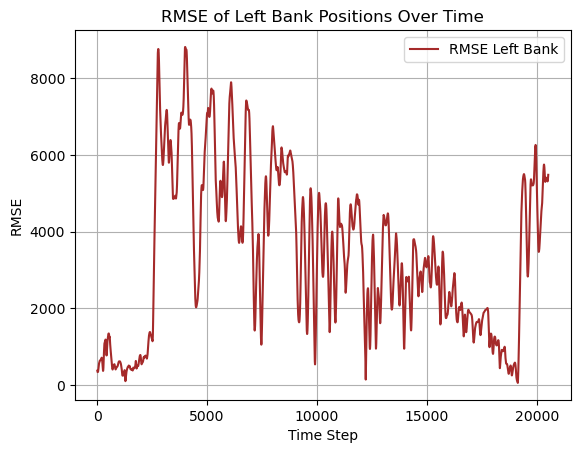

In [ ]:
# Calculate and plot rmse for left bank
# Use both X and Y for left bank (columns 4 and 5)
actual_c3 = actual_data[:n, 4:6]                        # [file:1]
pred_c3 = predicted_data[:n, 4:6]                       # [file:1]
rmse_left_bank = np.sqrt(np.mean((pred_c3 - actual_c3) ** 2, axis=1))  # [file:1]

plt.figure()
plt.plot(rmse_left_bank, label='RMSE Left Bank', color='brown')
plt.xlabel('Time Step (days)')
plt.ylabel('RMSE (m)')
plt.title('RMSE of Left Bank Positions Over Time')
plt.legend()
plt.grid()
plt.show()  